In [2]:
# Import standard libraries
import pandas as pd
import numpy as np
import scipy as sp
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import model libraries
import torch
import torchvision
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets

In [3]:
# Import data
train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=15, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=15, shuffle=True)

In [4]:
# Define the model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 86)
        self.fc2 = nn.Linear(86, 86)
        self.fc3 = nn.Linear(86, 86)
        self.fc4 = nn.Linear(86, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

model = NeuralNetwork()

In [5]:
# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
EPOCHS = 3
for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        model.zero_grad()
        output = model(X.view(-1, 28 * 28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0133, grad_fn=<NllLossBackward0>)
tensor(0.0468, grad_fn=<NllLossBackward0>)
tensor(0.1209, grad_fn=<NllLossBackward0>)


In [6]:
# Test accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testset:
        data_input, target = data
        output = model(data_input.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == target[idx]:
                correct += 1
            total += 1

print('Accuracy: %d %%' % (100 * correct / total))

Accuracy: 96 %


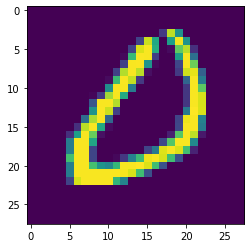

tensor(0)


In [9]:
# Plot sample number and classfication
plt.imshow(X[1].view(28,28))
plt.show()

print(torch.argmax(model(X[1].view(-1, 784))[0]))